**1-Downloading Dataset**

In [2]:

# The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network.
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


extracting data

In [3]:

import pickle
import gzip
import numpy

with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [4]:

#Kareem
#alternative method (like paper code)
import numpy as np
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(p[(mod,snr)])
        for i in range(p[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
print(X.shape)
print("one sample :")
print(X[1])

(162060, 2, 128)
one sample :
[[  -7.4243298   119.80825    -111.365616    -27.864609     49.59459
   -92.436195    -14.834814    -65.57745      99.30878    -140.20377
    -7.095288    160.27892     -29.569017    -46.14379     -83.981865
   155.57481      77.53324      21.80493     -48.08874      13.995204
    -9.42498     -77.13045      64.35481      51.588314    -10.118018
    59.934288     -8.07665     160.57787     -12.06533     -14.046684
     0.2559035   -34.061638    -62.329285    -37.375217    -20.721237
    35.750698     67.44018     -27.084063   -133.1575       20.650501
   -93.111984     46.712215     -7.806255    -56.23203      13.049609
    88.614685     15.365943     25.646896     68.06521    -167.36864
    65.36609     104.336044     40.968483     -2.8799818   -73.3598
    60.49153      66.64653     -50.082237    -26.81676      94.32984
   -59.568474     47.776936    -18.414425      2.6127734   140.26158
   -55.305504     91.71414      35.363003     26.607727    -21.2090

making sense of structure of data:

In [5]:


#Kareem
#all keys
print("keys:")
print(p.keys())
#print(p["QPSK",2].shape)
print("shape of all data:")
print(X.shape)
#list of all shapes:
shapes=[]
snrs=[]
mod_types=[]
for x in p.keys():
  shapes.append(p[x].shape)
  snrs.append(x[1])
  mod_types.append(x[0])
print("same distribution of number of samples as shown:")
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])


keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), 

# Conclusion of dataset structure:

Dataset has 11 modulation types and 20 SNR values forming 220 different keys
each key has different number of samples

each Modulation type (ex : QPSK,8PSK ...etc) has same number of samples for different SNRs

the 128 dimentions represent values at each micro second of 128 micro seconds so these are samples in time

drivative is the slope of a straight line and measures change of y with change of x so I think it is just the difference between each two consecutive sample values (over change of x which is 1)

for real valued vectors the drivative is called the gradient (there is a function in numpy for that)

numpy's diff does the job also very well (as far as I know) we need only difference between dimentions and divided by change in time which is 1 so only difference is needed


In [6]:
#drivative
import numpy as np
X_npArray=np.array(X)
print("before differentiation (2nd sample):")
print(X_npArray[0])
print("After diffrentiation : (you can see 1st element of any channel is diffrence between 1st and second of array before)")
X_driv=np.diff(X_npArray)
print(X_driv[0])
z=np.zeros((162060,2,1))
print("shape before:")
print(X_driv.shape)
X_driv=np.concatenate((z, X_driv), axis=2)
print("shape after:")
print(X_driv.shape)
print("element with added zeros :")
print(X_driv[0])
print(X[0])

before differentiation (2nd sample):
[[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
    -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
   -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
   -61.500935     37.332264    -28.064968     59.465668    -46.179398
   -26.009663    -52.362324     61.56313      65.796425     65.44162
    30.869577     43.397816     73.950745    -33.643257     -0.21010807
    96.22332      15.490614     41.540924     16.351875    -22.676212
    68.52634     -31.446701    -41.51053      47.405647     55.173832
    33.460255    -33.191044    -20.125128    104.928314     26.355001
   -81.8093       44.091236   -119.93215     -24.723804     24.986504
   -50.097115    128.2814        9.491681    -94.38004      15.686162
    -6.078274    -73.28054       1.6340322  -129.16805      23.974726
    35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
   119.80825    -111.365616    -27.864609     49.59

   -67.78499603   16.60443497   73.7334671 ]]
[[  24.714563    -29.568644     92.68012      -0.6211241    33.062744
    -6.2919946    -5.9258704  -131.96852     -69.56522      44.74652
   -89.15495    -101.97785     -18.323557    -30.385767      1.9968935
   -61.500935     37.332264    -28.064968     59.465668    -46.179398
   -26.009663    -52.362324     61.56313      65.796425     65.44162
    30.869577     43.397816     73.950745    -33.643257     -0.21010807
    96.22332      15.490614     41.540924     16.351875    -22.676212
    68.52634     -31.446701    -41.51053      47.405647     55.173832
    33.460255    -33.191044    -20.125128    104.928314     26.355001
   -81.8093       44.091236   -119.93215     -24.723804     24.986504
   -50.097115    128.2814        9.491681    -94.38004      15.686162
    -6.078274    -73.28054       1.6340322  -129.16805      23.974726
    35.450947    -39.942394    -69.48315     -26.419573     -7.4243298
   119.80825    -111.365616    -27.864609 

## Integration using trapzoidal cummulative integration
### setting initial value to zero to make arrays match in size ((127+1,128))

In [7]:
import numpy as np
from scipy import integrate

X_npArray=np.array(X)
#############################################
S=integrate.cumtrapz(X_npArray, initial=0)

In [8]:
#add dimention of zeros

X_play=X_driv
y=np.zeros((162060,2,1))
z=np.concatenate((y, X_play), axis=2)
print(z.shape)
print(z)

(162060, 2, 129)
[[[ 0.00000000e+00  0.00000000e+00 -5.42832069e+01 ...  1.07345413e+02
   -6.61913605e+01  2.10271988e+01]
  [ 0.00000000e+00  0.00000000e+00  5.59216690e+01 ... -6.77849960e+01
    1.66044350e+01  7.37334671e+01]]

 [[ 0.00000000e+00  0.00000000e+00  1.27232582e+02 ... -1.75403595e+00
   -8.18162918e+01  1.53791397e+02]
  [ 0.00000000e+00  0.00000000e+00 -1.88273788e+02 ... -3.00804138e+00
    3.48494110e+01  1.28415695e+02]]

 [[ 0.00000000e+00  0.00000000e+00 -1.95567078e+02 ... -4.37758751e+01
   -6.04475708e+01 -7.74727631e+00]
  [ 0.00000000e+00  0.00000000e+00  1.07342377e+01 ...  7.66553040e+01
   -9.56524658e+00 -2.79487953e+01]]

 ...

 [[ 0.00000000e+00  0.00000000e+00  2.30990052e-02 ... -9.17065144e-03
   -1.64687634e-04  9.24599171e-03]
  [ 0.00000000e+00  0.00000000e+00  7.99822807e-03 ...  1.08419657e-02
    1.21234655e-02 -8.38971138e-03]]

 [[ 0.00000000e+00  0.00000000e+00 -9.89055634e-03 ... -7.54594803e-03
   -7.32940435e-03  1.95705891e-03]
  [ 0.

In [9]:
combined_Data=np.zeros((162060,6,128))
print(combined_Data.shape)
for (i) in range(len(combined_Data)):
    combined_Data[i]=np.vstack((X[i],X_driv[i],S[i]))
print(combined_Data[0])

(162060, 6, 128)
[[ 2.47145634e+01 -2.95686436e+01  9.26801224e+01 -6.21124089e-01
   3.30627441e+01 -6.29199457e+00 -5.92587042e+00 -1.31968521e+02
  -6.95652237e+01  4.47465210e+01 -8.91549530e+01 -1.01977852e+02
  -1.83235569e+01 -3.03857670e+01  1.99689353e+00 -6.15009346e+01
   3.73322639e+01 -2.80649681e+01  5.94656677e+01 -4.61793976e+01
  -2.60096626e+01 -5.23623238e+01  6.15631294e+01  6.57964249e+01
   6.54416199e+01  3.08695774e+01  4.33978157e+01  7.39507446e+01
  -3.36432571e+01 -2.10108072e-01  9.62233200e+01  1.54906139e+01
   4.15409241e+01  1.63518753e+01 -2.26762123e+01  6.85263367e+01
  -3.14467010e+01 -4.15105286e+01  4.74056473e+01  5.51738319e+01
   3.34602547e+01 -3.31910439e+01 -2.01251278e+01  1.04928314e+02
   2.63550014e+01 -8.18093033e+01  4.40912361e+01 -1.19932152e+02
  -2.47238045e+01  2.49865036e+01 -5.00971146e+01  1.28281403e+02
   9.49168110e+00 -9.43800430e+01  1.56861620e+01 -6.07827377e+00
  -7.32805405e+01  1.63403225e+00 -1.29168045e+02  2.397472

2 dimentions vectors because complex values a vector for real value and imaginary value

In [10]:
# Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(..., ...) 

**The actual Network**

In [11]:
!pip install keras 
!pip install tflearn
!pip install tensor

loading samples from pickle file

In [12]:
%matplotlib inline
import os,random
#os.environ["KERAS_BACKEND"] = "theano"
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["THEANO_FLAGS"]  = "device=cuda,floatX=float32"
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
#from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras

# The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network.

with open('2016.04C.multisnr.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    Xd = u.load()
    


In [13]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

diffrentiation

In [14]:
#Kareem trying accuracy for differentiated data, uncomment the cell to see results

import numpy as np
X_npArray=np.array(X)

X=np.diff(X_npArray)


dividing data into training and testing sets

In [15]:
# Partition the data
#  into training and test sets of the form we can train/test on 

np.random.seed(2014)
n_examples = X.shape[0]
n_train = n_examples * 0.5
train_idx = np.random.choice(range(0,n_examples), size= int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
#changed from x to combined data
#X_train = combined_Data[train_idx]
#X_test =  combined_Data[test_idx]
X_train = X[train_idx]
X_test =  X[test_idx]

one hot encoding for multiclass classification since there are 11 classes (11 modulation techniques)

In [16]:
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1 
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [17]:
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

(81030, 2, 127) [2, 127]


parameters and structure of network

In [18]:
# Set up some params 
nb_epoch = 100    # number of epochs to train on
batch_size = 700  # training batch size

In [19]:
#fully connected neural network
dr = 0.1
model1 = keras.models.Sequential()
model1.add(Reshape(in_shp+[1], input_shape=in_shp))
model1.add(Dropout(dr))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model1.add(Dropout(dr))
model1.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense2"))
model1.add(Dropout(dr))
model1.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense3"))
model1.add(Dropout(dr))
model1.add(Dense(64, activation='relu', kernel_initializer='he_normal', name="dense4"))
model1.add(Dropout(dr))
model1.add(Dense( len(classes), kernel_initializer='he_normal', name="dense5" ))
model1.add(Activation('softmax'))
model1.add(Reshape([len(classes)]))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 127, 1)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 127, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 254)               0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               32640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense2 (Dense)               (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [20]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
history=model1.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model1.load_weights(filepath)

Train on 76978 samples, validate on 4052 samples
Epoch 1/100
 - 2s - loss: 4.8777 - acc: 0.1376 - val_loss: 2.6129 - val_acc: 0.1577
Epoch 2/100
 - 1s - loss: 2.4216 - acc: 0.1583 - val_loss: 2.2830 - val_acc: 0.1866
Epoch 3/100
 - 1s - loss: 2.2836 - acc: 0.1715 - val_loss: 2.2582 - val_acc: 0.1811
Epoch 4/100
 - 1s - loss: 2.2553 - acc: 0.1829 - val_loss: 2.2281 - val_acc: 0.1809
Epoch 5/100
 - 1s - loss: 2.2188 - acc: 0.1897 - val_loss: 2.1947 - val_acc: 0.1866
Epoch 6/100
 - 1s - loss: 2.1896 - acc: 0.1963 - val_loss: 2.1768 - val_acc: 0.1932
Epoch 7/100
 - 1s - loss: 2.1761 - acc: 0.2051 - val_loss: 2.1668 - val_acc: 0.2056
Epoch 8/100
 - 1s - loss: 2.1639 - acc: 0.2089 - val_loss: 2.1520 - val_acc: 0.2201
Epoch 9/100
 - 1s - loss: 2.1455 - acc: 0.2133 - val_loss: 2.1240 - val_acc: 0.2051
Epoch 10/100
 - 1s - loss: 2.1200 - acc: 0.2140 - val_loss: 2.0990 - val_acc: 0.2154
Epoch 11/100
 - 1s - loss: 2.1012 - acc: 0.2202 - val_loss: 2.0833 - val_acc: 0.2231
Epoch 12/100
 - 1s - loss

In [24]:
score = model1.evaluate(X_test, Y_test, batch_size=batch_size)
print(model1.metrics_names)
print (score)

81030/81030 [==============================] - 0s 4us/step
['loss', 'acc']
[1.4374567024165188, 0.4210169062616174]


In [25]:
import keras.models as models
# Build VT-CNN2 Neural Net model using Keras primitives -- 
#  - Reshape [N,2,128] to [N,1,2,128] on input
#  - Pass through 2 2DConv/ReLu layers
#  - Pass through 2 Dense layers (ReLu and Softmax)
#  - Perform categorical cross entropy optimization
 
dr = 0.1 # dropout rate (%)
model = keras.models.Sequential()
model.add(Reshape(in_shp+[1], input_shape=in_shp))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 2, 127, 1)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 2, 131, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 2, 129, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 129, 64)        0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 2, 133, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 131, 16)        6160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 131, 16)        0         
__________

training the model :

In [26]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
     validation_split=0.05,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Train on 76978 samples, validate on 4052 samples
Epoch 1/100
 - 74s - loss: 2.4465 - acc: 0.1500 - val_loss: 2.2781 - val_acc: 0.1483
Epoch 2/100
 - 80s - loss: 2.2500 - acc: 0.1783 - val_loss: 2.1418 - val_acc: 0.2463
Epoch 3/100
 - 81s - loss: 1.9980 - acc: 0.2931 - val_loss: 1.8342 - val_acc: 0.3406
Epoch 4/100
 - 79s - loss: 1.6954 - acc: 0.3518 - val_loss: 1.5799 - val_acc: 0.3956
Epoch 5/100
 - 75s - loss: 1.5491 - acc: 0.4005 - val_loss: 1.5185 - val_acc: 0.4065
Epoch 6/100
 - 72s - loss: 1.4805 - acc: 0.4261 - val_loss: 1.4721 - val_acc: 0.4294
Epoch 7/100
 - 74s - loss: 1.4206 - acc: 0.4526 - val_loss: 1.4468 - val_acc: 0.4467
Epoch 8/100
 - 79s - loss: 1.3712 - acc: 0.4741 - val_loss: 1.4290 - val_acc: 0.4526
Epoch 9/100
 - 79s - loss: 1.3261 - acc: 0.4899 - val_loss: 1.4270 - val_acc: 0.4521
Epoch 10/100
 - 78s - loss: 1.2837 - acc: 0.5067 - val_loss: 1.4294 - val_acc: 0.4514
Epoch 11/100
 - 80s - loss: 1.2330 - acc: 0.5237 - val_loss: 1.4392 - val_acc: 0.4556
Epoch 12/100
 

testing the model:

In [27]:
scscore = model.evaluate(X_test, Y_test, batch_size=batch_size)
print(model.metrics_names)
print (scscore)

81030/81030 [==============================] - 25s 309us/step
['loss', 'acc']
[1.3861426052934047, 0.46950512204113964]


visuals :

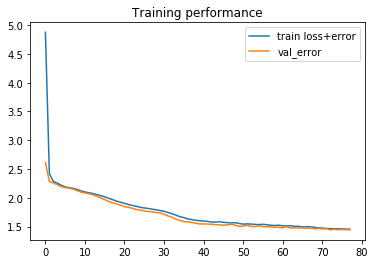

In [28]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [29]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

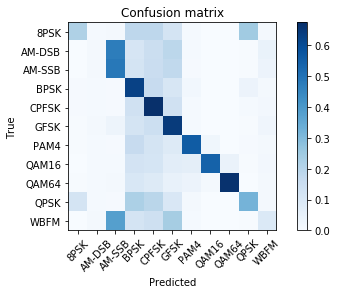

In [30]:
# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

Overall Prediction:  0.13454903893543618
Overall Prediction:  0.14626939177542478
Overall Prediction:  0.1431377363123005
Overall Prediction:  0.14752851711026616
Overall Prediction:  0.14996288047512993
Overall Prediction:  0.15156751419402617
Overall Prediction:  0.17738791423001948
Overall Prediction:  0.26951897510273143
Overall Prediction:  0.3615916955017301
Overall Prediction:  0.4305691854759568
Overall Prediction:  0.5912336862841665
Overall Prediction:  0.6836906769453144
Overall Prediction:  0.7182785060598565
Overall Prediction:  0.7152383304519635
Overall Prediction:  0.7619165225981724
Overall Prediction:  0.7455606291222729
Overall Prediction:  0.7634700939199209
Overall Prediction:  0.7628613424791769
Overall Prediction:  0.772760736196319
Overall Prediction:  0.7723350253807106


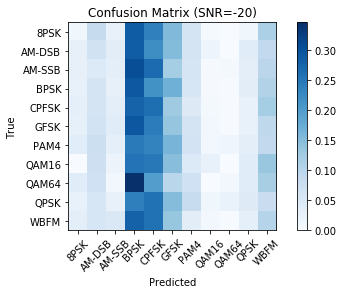

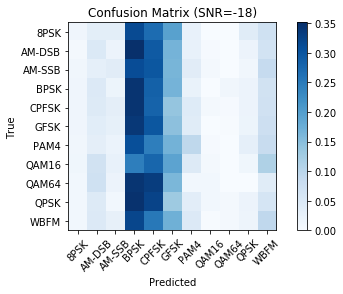

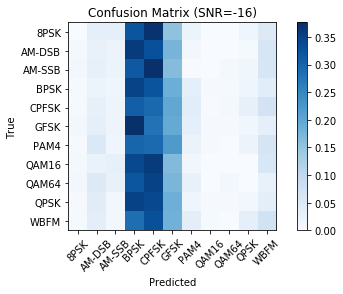

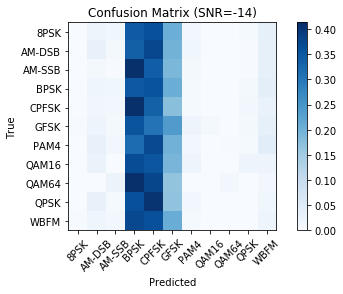

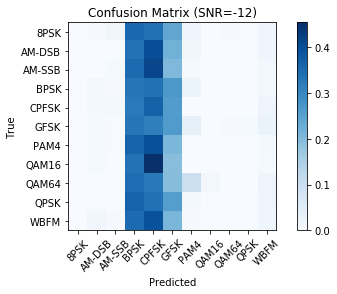

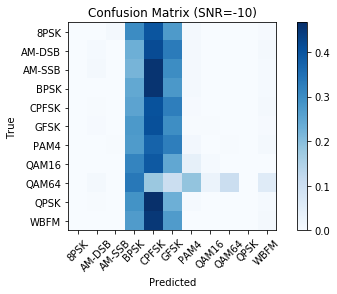

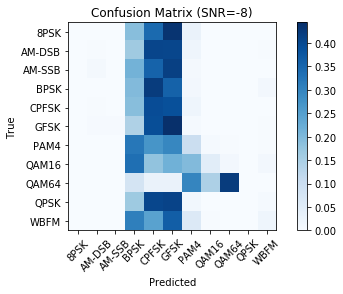

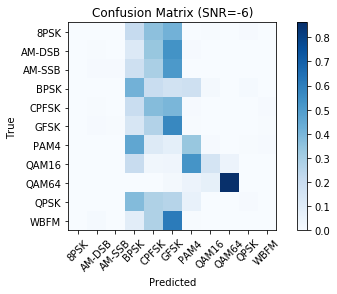

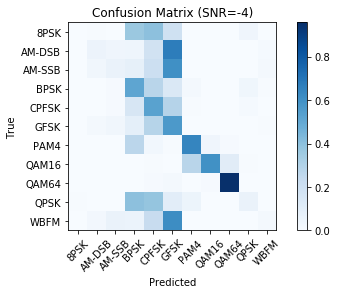

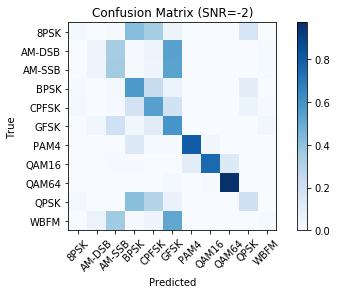

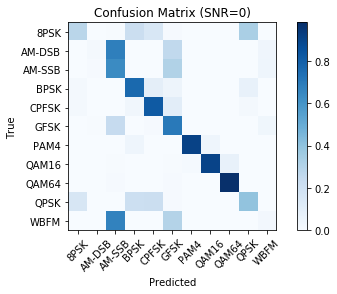

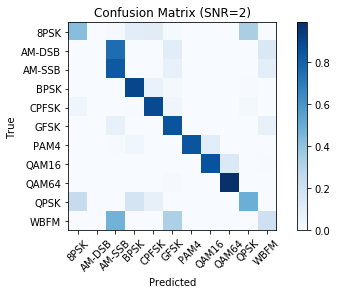

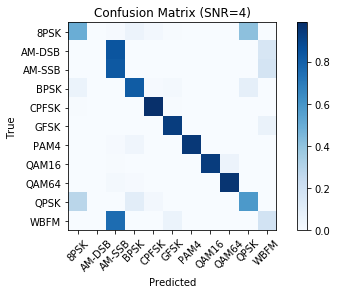

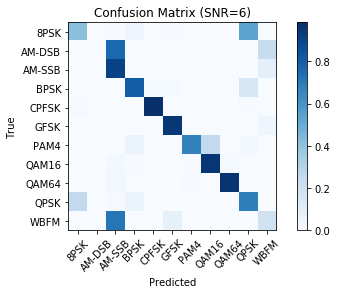

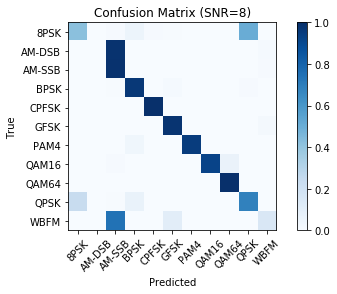

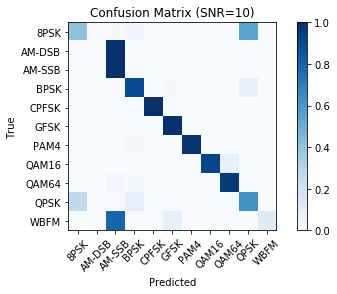

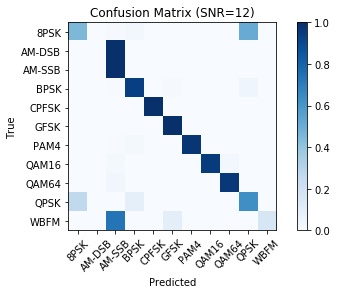

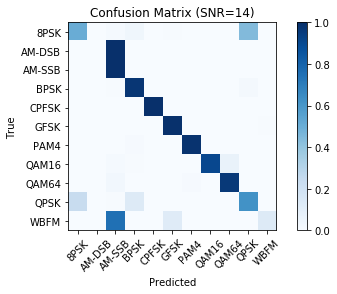

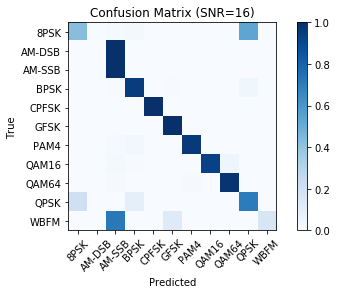

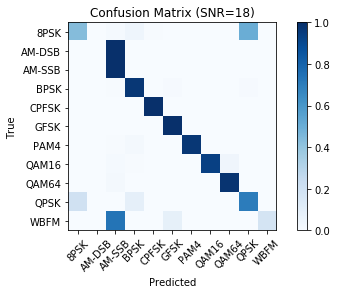

In [31]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Prediction: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'Free frequency prediction on RadioML 2016.10 Alpha')

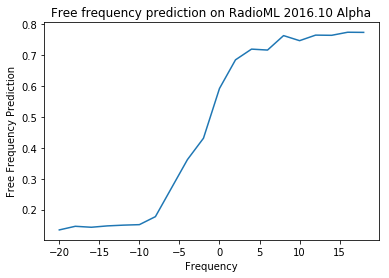

In [32]:
# Plot accuracy curve
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Frequency")
plt.ylabel("Free Frequency Prediction")
plt.title("Free frequency prediction on RadioML 2016.10 Alpha")